In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [103]:

a, b = -0, 4  # границы
n = 5 # интервалы
h = (b - a) / n  # шаг 

def f(x):
    return np.sin(x)

x_nodes = np.linspace(a, b, n + 1)
y_nodes = f(x_nodes)

def lagrange_poly(x, x_nodes, y_nodes):
    n = len(x_nodes)
    L = 0
    for i in range(n):
        li = np.prod([(x - x_nodes[j]) / (x_nodes[i] - x_nodes[j]) for j in range(n) if j != i], axis=0)
        L += y_nodes[i] * li
    return L

def divided_differences(x_nodes, y_nodes):
    n = len(x_nodes)
    coef = np.copy(y_nodes)
    for j in range(1, n):
        coef[j:] = (coef[j:] - coef[j - 1]) / (x_nodes[j:] - x_nodes[j - 1])
    return coef

def newton_poly(x, x_nodes, coef):
    n = len(x_nodes)
    P = coef[0]
    for i in range(1, n):
        term = coef[i]
        for j in range(i):
            term *= (x - x_nodes[j])
        P += term
    return P




x_half = np.linspace(a, b, 2 * n + 1)
y_exact = f(x_half)
y_lagrange = lagrange_poly(x_half, x_nodes, y_nodes)
newton_coef = divided_differences(x_nodes, y_nodes)
y_newton = newton_poly(x_half, x_nodes, newton_coef)

def f6(x):
    return -np.sin(x)
# погрешность 
def theoretical_error(n, a, b, x1):
    # if x1 < a or x1> b:
        # return None
    x_test = np.linspace(a, b, 1000)
    derivatives = f6(x_test)
    max_derivative_value = np.max(derivatives)  

    def th(n,a,b,x1):
        product_max = np.prod([x1 - x for x in x_nodes])
        error_bound = (max_derivative_value / np.math.factorial(n + 1)) * product_max
        return error_bound
    res = list()
    for x_0 in x1:
        res.append(th(n,a,b,x_0))
    return res

# погрешности
errors_lagrange = np.abs(y_exact - y_lagrange)
errors_newton = np.abs(y_exact - y_newton)
th_er = theoretical_error(n,a,b, x_half)
# Формируем таблицу
# results = np.vstack((x_half, y_exact, y_lagrange, y_newton, errors_lagrange, errors_newton)).T
results = pd.DataFrame({"X":x_half, "Y":y_exact, "L":y_lagrange, "P": y_newton, "Error_L":errors_lagrange, "Error_P":errors_newton, "R": th_er})
results


,X,Y,L,P,Error_L,Error_P,R
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-0.000000
1,0.4,0.389418,0.384743,0.384743,0.004675,4.675015e-03,-0.004069
2,0.8,0.717356,0.717356,0.717356,0.000000,0.000000e+00,0.000000
3,1.2,0.932039,0.933574,0.933574,0.001535,1.535031e-03,0.001356
4,1.6,0.999574,0.999574,0.999574,0.000000,0.000000e+00,-0.000000
5,2.0,0.909297,0.908244,0.908244,0.001053,1.053046e-03,-0.000969
6,2.4,0.675463,0.675463,0.675463,0.000000,0.000000e+00,0.000000
7,2.8,0.334988,0.336367,0.336367,0.001379,1.378748e-03,0.001356
8,3.2,-0.058374,-0.058374,-0.058374,0.000000,3.747003e-16,-0.000000
9,3.6,-0.442520,-0.446283,-0.446283,0.003762,3.762488e-03,-0.004069


In [104]:
import seaborn as sns   
sns.set_theme("paper")

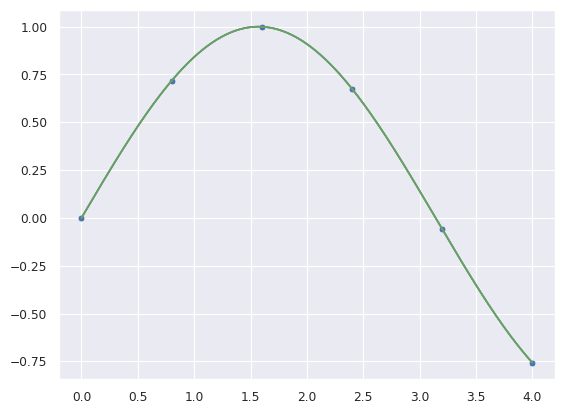

In [105]:
x = np.linspace(a,b, 1000)
y = f(x)
y_lag = lagrange_poly(x, x_half, y_exact)
y_new = newton_poly(x, x_half, divided_differences(x_half,y_exact))
sns.lineplot(y=y_new, x=x)
sns.lineplot(y=y_lag, x=x)
sns.lineplot(y=y, x=x)
sns.scatterplot(y=f(x_nodes),x=x_nodes)
plt.show()

In [102]:
asd = pd.DataFrame(np.vstack((x_nodes.T, f(x_nodes).T)))
asd

,0,1,2,3,4,5
0,-13.000000,-7.800000,-2.600000,2.600000,7.800000,13.000000
1,-0.420167,-0.998543,-0.515501,0.515501,0.998543,0.420167
